In [278]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np

with MPRester("NrRTCZ9vfEUg8SJu") as m:
    #Téléchargement des bandes d'énergie
    bande = m.get_bandstructure_by_material_id("mp-12908", True)
B = BSPlotter(bande)
tab = B.bs_plot_data(zero_to_efermi=True)

energie = tab.get('energy')

#Permet d'obtenir la bande interdite
bi = tab.get('band_gap')
print("Bande interdite")
print(bi)
print("La bande interdite est indirecte et a une énergie de 0,6802")

Bande interdite
Indirect A-L bandgap = 0.6802000000000001
La bande interdite est indirecte et a une énergie de 0,6802


In [ ]:
Pour calculer la direction dans la dernière (première) 
bande de valence (conduction) présente le plus et le moins de
dispersion, on calcule la pente des bandes. 
D'abord, on détermine la dernière bande de valence et la première
bande de conduction. Pour cela, je parcous l'ensemble des bandes 
dans chaque branche et je cherche la bande dont l'énergie est la 
plus proche de 0 pour la bande de valence et 0.68 (la valeur de la 
bande interdite) pour la bande de conduction. 
J'obtiens que la bande maximale de valence est la bande 16
sauf pour les branches 4,5 et 7 où les bandes sont les 15 et 16. 
et que la bande minimale de conduction est la bande 17 
sauf pour la branche 4 où les bandes sont les 16 et 17. (Les 
branches sont notés de 0 à 8).                                                      
Ensuite, je calcule la pente de ces bandes dans chaque branche. 
Pour cela, je fais une interpolation linéaire en utilisant le point
minimal et le point maximal. 
Les points de dispersion min et max correspondent 
respectivement aux pentes min et max. 
Pour la direction, je regarde sur le graphe de l'énergie en fonction 
du vecteur d'onde. 

In [279]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np

with MPRester("NrRTCZ9vfEUg8SJu") as m:
    bande = m.get_bandstructure_by_material_id("mp-12908", True)
B = BSPlotter(bande)
tab = B.bs_plot_data(zero_to_efermi=True)

energie = tab.get('energy')

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]                

for i in range (0,len(energie)):
    for j in range (0,len(energie[i].get('1'))):
        for k in range (0,len(energie[i].get('1')[k])):
            if (energie[i].get('1')[j][k] < 0.68):
                energie[i].get('1')[j][k] = -10
                
# Permet de détermner la bande de conduction dans chaque branche
valconduction = []
indexconduction = []
for i in range (0,len(energie)):
    fnconduction = []
    for j in range (0,len(energie[i].get('1'))):
        fn = find_nearest(energie[i].get('1')[j],0.6802000000000001)
        fnconduction = fnconduction + [fn]
    valconduction = valconduction + [find_nearest(fnconduction,0.6802000000000001)]
    indexconduction = indexconduction + [np.where(fnconduction == valconduction[i])]
    
print("Bande de conduction dans chaque branche")
print(indexconduction)

Bande de conduction dans chaque branche
[(array([17]),), (array([17]),), (array([17]),), (array([17, 18]),), (array([17]),), (array([17]),), (array([17]),), (array([17]),), (array([17]),)]


In [280]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np

with MPRester("NrRTCZ9vfEUg8SJu") as m:
    bande = m.get_bandstructure_by_material_id("mp-12908", True)
B = BSPlotter(bande)
tab = B.bs_plot_data(zero_to_efermi=True)

energie = tab.get('energy')

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx] 

for i in range (0,len(energie)):
    for j in range (0,len(energie[i].get('1'))):
        for k in range (0,len(energie[i].get('1')[k])):
            if (energie[i].get('1')[j][k] > 0.68):
                energie[i].get('1')[j][k] = 10
                
# Permet de détermner la bande de valence dans chaque branche
valvalence = []
indexvalence = []
for i in range (0,len(energie)):
    fnvalence = []
    for j in range (0,len(energie[i].get('1'))):
        fn = find_nearest(energie[i].get('1')[j],0.0)
        fnvalence = fnvalence + [fn]
    valvalence = valvalence + [find_nearest(fnvalence,0.0)]
    indexvalence = indexvalence + [np.where(fnvalence == valvalence[i])]

print("Bande de conduction dans chaque branche")    
print(indexvalence)

Bande de conduction dans chaque branche
[(array([16]),), (array([16]),), (array([16]),), (array([15, 16]),), (array([15, 16]),), (array([16]),), (array([15, 16]),), (array([16]),), (array([15, 16]),)]


Pentes min et max des bandes de valence
0.8662039245059384 1.6218114339483405
Ils se trouvent respectivement dans les bandes
(array([1]),) (array([7]),)
Il s'agit respectivement des branches de direction
MK et A|L M|K
 
Pentes min et max des bandes de conduction
0.14143060782736028 1.981340723226095
Ils se trouvent respectivement dans les bandes
(array([2]),) (array([5]),)
Il s'agit respectivement des branches de direction
H Gamma et LH
Les fleches indiquant les min sont en vert et celles indiquant les max sont en rouge


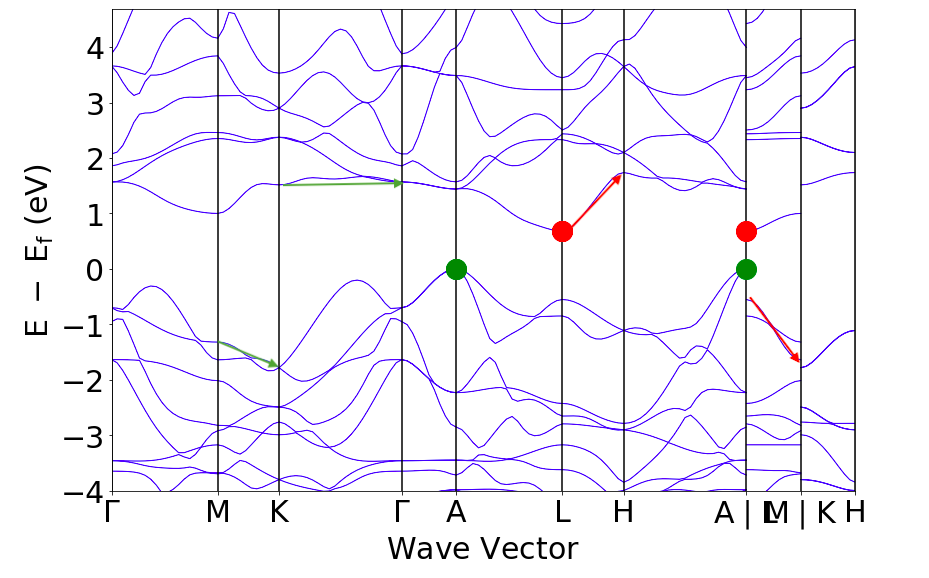

In [275]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
from IPython.display import Image

with MPRester("NrRTCZ9vfEUg8SJu") as m:
    bande = m.get_bandstructure_by_material_id("mp-12908", True)
B = BSPlotter(bande)
tab = B.bs_plot_data(zero_to_efermi=True)

energie = tab.get('energy')
distances = tab.get('distances')

# Permet de calculer la pente pour les bandes de valence
pentesvalence = []
for i in range (0,len(energie)):
    deltax = np.max(distances[i])-np.min(distances[i])
    j=16 #Numéro bande de valence
    deltay = np.max(energie[i].get('1')[j])-np.min(energie[i].get('1')[j])
    pente = deltay / deltax
    pentesvalence = pentesvalence+[pente]
pentevalencemax = np.max(pentesvalence)
indexvalencenmax = np.where(pentesvalence == pentevalencemax)
pentevalencemin = np.min(pentesvalence)
indexvalencenmin = np.where(pentesvalence == pentevalencemin)
print("Pentes min et max des bandes de valence")
print(pentevalencemin, pentevalencemax)
print("Elles se trouvent respectivement dans les bandes")
print(indexvalencenmin,indexvalencenmax)
print("Il s'agit respectivement des branches de direction")
print("MK et A|L M|K")

# Permet de calculer la pente pour les bandes de conduction
pentesconduction = []
for i in range (0,len(energie)):
    deltax = np.max(distances[i])-np.min(distances[i])
    j=17 #Numéro bande de conduction
    deltay = np.max(energie[i].get('1')[j])-np.min(energie[i].get('1')[j])
    pente = deltay / deltax
    pentesconduction = pentesconduction+[pente]
penteconductionmax = np.max(pentesconduction)
indexconductionmax = np.where(pentesconduction == penteconductionmax)
penteconductionmin = np.min(pentesconduction)
indexconductionmin = np.where(pentesconduction == penteconductionmin)
print(" ")
print("Pentes min et max des bandes de conduction")
print(penteconductionmin,penteconductionmax)
print("Elles se trouvent respectivement dans les bandes")
print(indexconductionmin,indexconductionmax)
print("Il s'agit respectivement des branches de direction")
print("H Gamma et LH")
print("Les fleches indiquant les min sont en vert et celles indiquant les max sont en rouge")
Image(filename="Bandes.png",width=700)

In [ ]:
Pour calculer la masse effective au sommet (base) de la dernière 
(première) bande de valence (conduction) en supposant une 
dispersion parabolique, on calcule la dérivée seconde de ces bandes.
masse effective = (h bar)/(dérivée seconde 
                de l'énergie en fonction du vecteur d'onde)
D'abord, je déterminer les sommets et les bases.
Ensuite, j'interpole avec une fonction du second degré en utilisant
polyfit. Cette fonction renvoie les coefficient de la fonction 
ax^2+bx+c dont la dérivée seconde vaut 2a. Pour que les unités soient correcte, 
je divise un par un eV et par un Å^2 pour avoir la masse en kg.

In [288]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np

with MPRester("NrRTCZ9vfEUg8SJu") as m:
    bande = m.get_bandstructure_by_material_id("mp-12908", True)
B = BSPlotter(bande)
tab = B.bs_plot_data(zero_to_efermi=True)

energie = tab.get('energy')
distances = tab.get('distances')

#Permet de déterminer les sommets de la derniere bande de valence (branche,bande)
print("Sommets")
for i in range (0,len(energie)):
    for j in range (0,len(energie[i].get('1'))):
        for k in range (0,len(energie[i].get('1')[j])):
            if (energie[i].get('1')[j])[k] == 0:
                print(i,j)
                
#Permet de déterminer les bases de la premiere bande de conduction")
print("Bases")
for i in range (0,len(energie)):
    for j in range (0,len(energie[i].get('1'))):
        for k in range (0,len(energie[i].get('1')[j])):
            if (energie[i].get('1')[j])[k] == 0.6802000000000001:
                print(i,j)

#Permet le calcul de la masse effective
#Sommet 1 bande de valence
x1 = distances[3]
x2 = distances[4]
x = x1+x2
y1 = energie[3].get('1')[16]
y2 = energie[4].get('1')[16]
y = y1+y2
[a,b,c]=np.polyfit(x,y,2)
hbar = 6.62607015*10**(-34)/(2.0*np.pi)
masse = (hbar)**2/(2*a*1.602*10**(-39))
#Sommet 2 bande de valence
x3 = distances[7]
x4 = distances[8]
xb = x3+x4
y3 = energie[7].get('1')[16]
y4 = energie[8].get('1')[16]
yb = y3+y4
[ab,bb,cb]=np.polyfit(xb,yb,2)
masseb = (hbar)**2/(2*ab*1.602*10**(-39))

#Base 1 bande de conduction
x9 = distances[4]
x10 = distances[5]
xe = x9+x10
y9 = energie[4].get('1')[17]
y10 = energie[5].get('1')[17]
ye = y9+y10
[ae,be,ce]=np.polyfit(xe,ye,2)
massee = (hbar)**2/(2*ae*1.602*10**(-39))
#Base 2 bande de conduction
x11 = distances[6]
x12 = distances[7]
xf = x11+x12
y11 = energie[6].get('1')[17]
y12 = energie[7].get('1')[17]
yf = y11+y12
[af,bf,cf]=np.polyfit(xf,yf,2)
massef = (hbar)**2/(2*af*1.602*10**(-39))

print(" ")
print("Les masses effectives [kg] aux sommets de la bande de valence sont")
print(masse)
print(masseb)
print("Les masses effectives [kg] aux bases de la bande de conduction sont")
print(massee)
print(massef)

Sommets
3 15
3 16
4 15
4 16
6 15
6 16
Bases
4 17
5 17
7 17
 
Les masses effectives [kg] aux sommets de la bande de valence sont
-4.386146100209056e-30
1.016433771119471e-30
Les masses effectives [kg] aux bases de la bande de conduction sont
1.9073430258015613e-30
-1.8080606335700865e-29


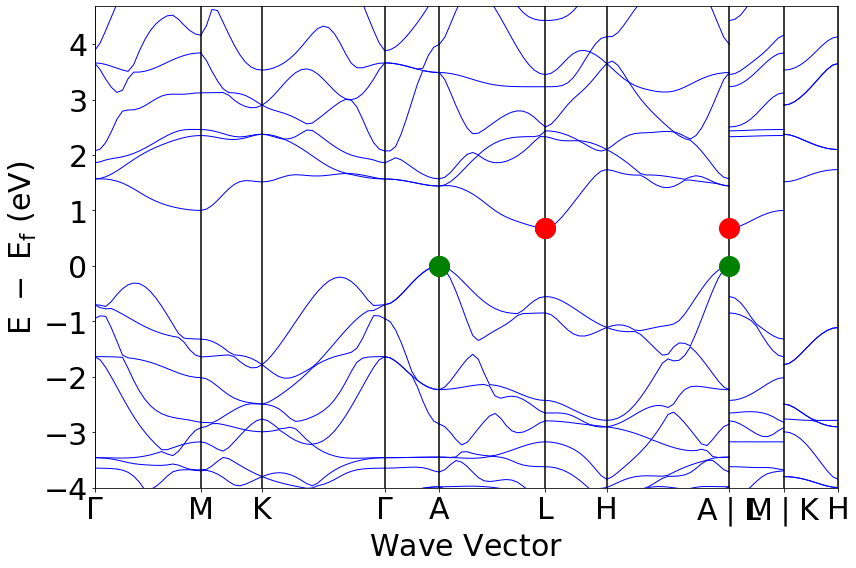

In [268]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

with MPRester("NrRTCZ9vfEUg8SJu") as m:
    bande = m.get_bandstructure_by_material_id("mp-12908", True)
B = BSPlotter(bande)
tab = B.bs_plot_data(zero_to_efermi=True)
vbm = tab.get('vbm')
cbm = tab.get('cbm')

B.get_plot()
plt.plot(vbm[0][0],vbm[0][1], 'go',markersize=20)
plt.plot(vbm[1][0],vbm[1][1], 'go',markersize=20)
plt.plot(vbm[2][0],vbm[2][1], 'go',markersize=20)
plt.plot(cbm[0][0],cbm[0][1], 'ro',markersize=20)
plt.plot(cbm[1][0],cbm[1][1], 'ro',markersize=20)
plt.plot(cbm[2][0],cbm[2][1], 'ro',markersize=20)
